In [119]:
import scvelo as scv
import pandas as pd
import matplotlib.pyplot as plt
import os
# Pancreas
import scanpy
from scipy.stats import mannwhitneyu
import statsmodels.stats.multitest as multitest
import numpy as np

In [153]:
# sample mannwhitneyu
males = [88, 1000, 22, 88, 99]
females = [20, 11, 17, 12]
U1, p = mannwhitneyu(males, females,alternative="greater")
print(U1)
print(p)
# END sample

20.0
0.009725516665681238


In [3]:
not_combined_detail=False
# combine detail
if not_combined_detail:
    # load raw
    raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/scv_data_full.csv"
    load_raw_data = pd.read_csv(raw_data_path)

    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes'
    path_name_after_no='_all_geneepoch300check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.5N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p5smoW0.1binTrue/detail_e300.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)

    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()

    load_cellDancer['clusters']=load_raw_data['clusters']
    load_cellDancer['cellID']=load_raw_data['cellID']
    load_cellDancer['embedding1']=load_raw_data['embedding1']
    load_cellDancer['embedding2']=load_raw_data['embedding2']
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv',index=False)
else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv')

In [4]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


In [233]:
def get_mannwhitneyu(load_cellDancer,celltype):
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    idx_cell_choice=(onegene.clusters==celltype)
    idx_cell_choice.index=onegene.cellID

    para_df=load_cellDancer.pivot(index='cellID', columns='gene_name', values='alpha')
    mannwhitneyu_df=para_df.apply(lambda x: mannwhitneyu(x[idx_cell_choice], x[~idx_cell_choice],alternative="greater"))
    mannwhitneyu_df.index=["MannWhitneyU","p"]
    mannwhitneyu_df_sorted=mannwhitneyu_df.T.sort_values(by=['p'])

    return(mannwhitneyu_df_sorted)

def get_fold_cell_choice(load_cellDancer,celltype):
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    idx_cell_choice=(onegene.clusters==celltype)
    idx_cell_choice.index=onegene.cellID

    para_df=load_cellDancer.pivot(index='cellID', columns='gene_name', values='alpha')
    def get_fold(cluster_choice,cluster_left):
        fold_change=np.log((np.mean(cluster_choice)+1)/(np.mean(cluster_left)+1))

        return(fold_change)


    para_fold_df=para_df.apply(lambda x: get_fold(x[idx_cell_choice], x[~idx_cell_choice]))
    para_fold_df=pd.DataFrame(para_fold_df)
    para_fold_df.columns = ['fold_change']
    
    return(para_fold_df)


def filter_by_p_fold(load_cellDancer,celltype):
    mannwhitneyu_df_sorted=get_mannwhitneyu(load_cellDancer,celltype)
    fold_df=get_fold_cell_choice(load_cellDancer,celltype)
    fold_and_mannwhitneyu=pd.merge(mannwhitneyu_df_sorted, fold_df, left_index=True, right_index=True)
    fold_and_mannwhitneyu_filter_p=fold_and_mannwhitneyu[fold_and_mannwhitneyu.p<0.05]
    fold_and_mannwhitneyu_filter_neg_fold=fold_and_mannwhitneyu[fold_and_mannwhitneyu.fold_change>=0]
    top_fold=fold_and_mannwhitneyu_filter_p.nlargest(100,'fold_change')
    top_fold=top_fold.sort_values(by='fold_change', ascending=False)
    return (top_fold)

In [283]:
no1_Ductal=filter_by_p_fold(load_cellDancer,'Ductal')
no2_Ngn3_low_EP=filter_by_p_fold(load_cellDancer,'Ngn3 low EP')
no3_Ngn3_high_EP=filter_by_p_fold(load_cellDancer,'Ngn3 high EP')
no4_Pre_endocrine=filter_by_p_fold(load_cellDancer,'Pre-endocrine')
no5_Alpha=filter_by_p_fold(load_cellDancer,'Alpha')
no6_Beta=filter_by_p_fold(load_cellDancer,'Beta')
no7_Delta=filter_by_p_fold(load_cellDancer,'Delta')
no8_Epsilon=filter_by_p_fold(load_cellDancer,'Epsilon')

In [263]:
order_heatmal_bkup=[no1_Ductal,no2_Ngn3_low_EP,no3_Ngn3_high_EP,no4_Pre_endocrine,no5_Alpha,no6_Beta,no7_Delta,no8_Epsilon]

<AxesSubplot:>

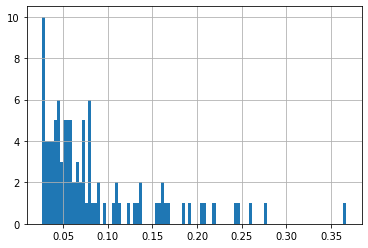

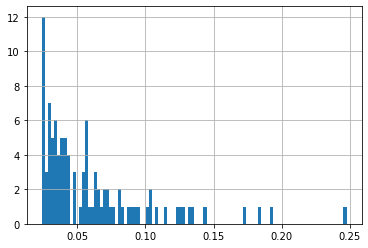

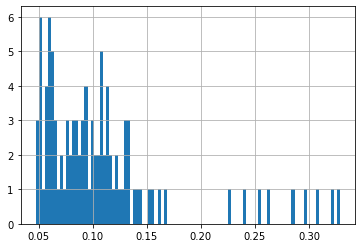

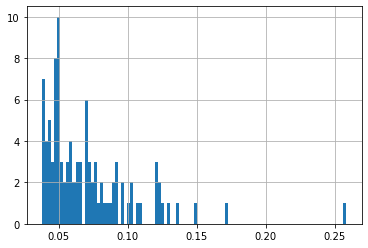

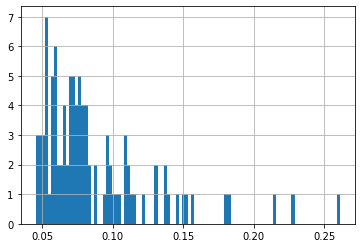

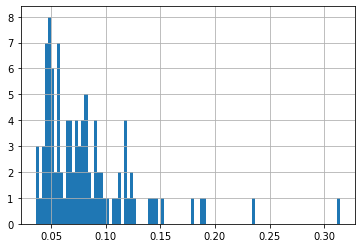

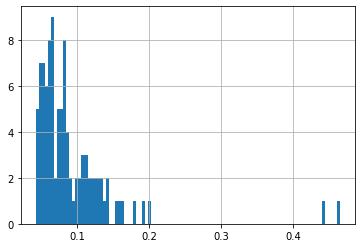

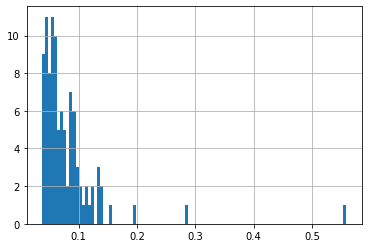

In [257]:
no1_Ductal['fold_change'].hist(bins=100)
plt.figure()
no2_Ngn3_low_EP['fold_change'].hist(bins=100)
plt.figure()
no3_Ngn3_high_EP['fold_change'].hist(bins=100)
plt.figure()
no4_Pre_endocrine['fold_change'].hist(bins=100)
plt.figure()
no5_Alpha['fold_change'].hist(bins=100)
plt.figure()
no6_Beta['fold_change'].hist(bins=100)
plt.figure()
no7_Delta['fold_change'].hist(bins=100)
plt.figure()
no8_Epsilon['fold_change'].hist(bins=100)

In [286]:
no3_Ngn3_high_EP[no3_Ngn3_high_EP.index=='Sulf2']

,MannWhitneyU,p,fold_change
gene_name,,,
Sulf2,1596002.0,8.683119e-139,0.06564


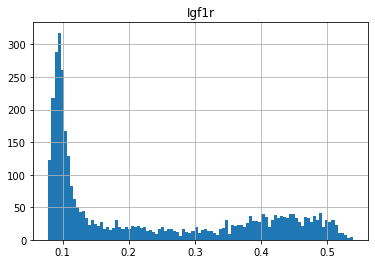

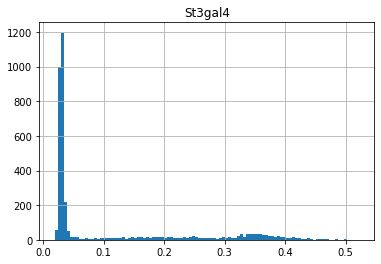

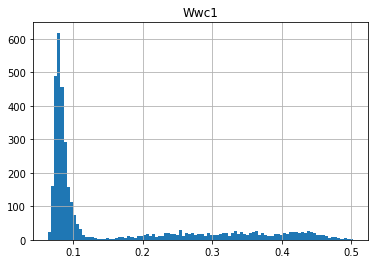

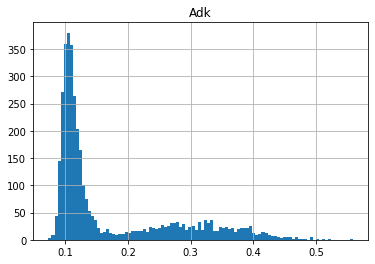

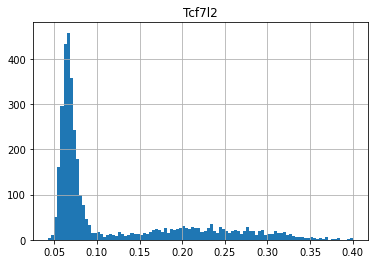

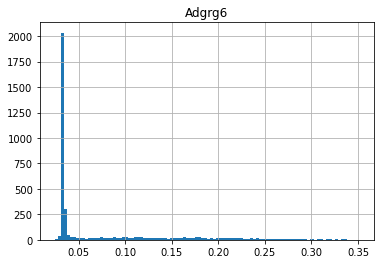

In [304]:
# para_df=load_cellDancer.pivot(index='cellID', columns='gene_name', values='alpha')
# for i in para_df.columns[0:10]:
#     plt.figure()
#     para_df[i].hist(bins=100)
#     plt.title(i)

gene_list=['Igf1r','St3gal4','Wwc1','Adk','Tcf7l2','Adgrg6']
for gene in gene_list:
    plt.figure()
    para_df[gene].hist(bins=100)
    plt.title(gene)
    # plt.xlim(0,0.15)

In [272]:
#threshold=0.05
threshold=0.1
no1_Ductal=no1_Ductal[no1_Ductal.fold_change>threshold]
no2_Ngn3_low_EP=no2_Ngn3_low_EP[no2_Ngn3_low_EP.fold_change>threshold]
no3_Ngn3_high_EP=no3_Ngn3_high_EP[no3_Ngn3_high_EP.fold_change>threshold]
no4_Pre_endocrine=no4_Pre_endocrine[no4_Pre_endocrine.fold_change>threshold]
no5_Alpha=no5_Alpha[no5_Alpha.fold_change>threshold]
no6_Beta=no6_Beta[no6_Beta.fold_change>threshold]
no7_Delta=no7_Delta[no7_Delta.fold_change>threshold]
no8_Epsilon=no8_Epsilon[no8_Epsilon.fold_change>threshold]

In [273]:
def get_celltype_gene_top100(load_cellDancer,celltype_list,cell_type_index):
    para_df=load_cellDancer.pivot(index='cellID', columns='gene_name', values='alpha')

    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]

    celltype_list_order=[]
    for celltype in celltype_list:
        idx_cell_choice=onegene[onegene.clusters==celltype]['cellID']
        celltype_list_order=celltype_list_order+list(idx_cell_choice)

    alpha_map_cond=para_df[cell_type_index].T[celltype_list_order]

    return(alpha_map_cond)


celltype_list=['Ductal','Ngn3 low EP','Ngn3 high EP','Pre-endocrine','Alpha','Beta','Delta','Epsilon']
no1_Ductal_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no1_Ductal.index)
no2_Ngn3_low_EP_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no2_Ngn3_low_EP.index)
no3_Ngn3_high_EP_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no3_Ngn3_high_EP.index)
no4_Pre_endocrine_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no4_Pre_endocrine.index)
no5_Alpha_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no5_Alpha.index)
no6_Beta_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no6_Beta.index)
no7_Delta_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no7_Delta.index)
no8_Epsilon_heatmap=get_celltype_gene_top100(load_cellDancer,celltype_list,no8_Epsilon.index)
# alpha_map_cond.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/p_zero_alpha.csv')

In [274]:
heatmap_list=[no1_Ductal_heatmap,no2_Ngn3_low_EP_heatmap,no3_Ngn3_high_EP_heatmap,no4_Pre_endocrine_heatmap,no5_Alpha_heatmap,no6_Beta_heatmap,no7_Delta_heatmap,no8_Epsilon_heatmap]
heatmap_df=pd.DataFrame()
for i in heatmap_list:
    heatmap_df=heatmap_df.append(i)
heatmap_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter_fold_greater_0.1.csv')
#heatmap_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter.csv')

In [238]:
heatmap_list=[no1_Ductal_heatmap]
heatmap_df=pd.DataFrame()
for i in heatmap_list:
    heatmap_df=heatmap_df.append(i)
heatmap_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter_1.csv')

In [239]:
heatmap_list=[no2_Ngn3_low_EP_heatmap]
heatmap_df=pd.DataFrame()
for i in heatmap_list:
    heatmap_df=heatmap_df.append(i)
heatmap_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter_2.csv')

In [183]:
#fold_and_mannwhitneyu=mannwhitneyu_df_sorted.join(fold_df) # combine


In [246]:
onegene[onegene.clusters=='Ductal']
#onegene[onegene.clusters=='Ngn3 low EP']
#onegene[onegene.clusters=='Ngn3 high EP']





,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
5,5,2010107G23Rik,0.512232,0.000000,0.500910,0.000438,0.004030,0.030645,0.144819,0.085577,Ductal,AAACCTGGTATTAGCC,-10.936558,0.773883
7,7,2010107G23Rik,0.573697,0.051861,0.582369,0.050598,0.002266,0.012651,0.160822,0.085577,Ductal,AAACCTGTCTTTCCTC,-12.126013,1.746185
8,8,2010107G23Rik,0.147340,0.000000,0.143990,0.000421,0.003874,0.024907,0.148946,0.085577,Ductal,AAACGGGAGACAATAC,-10.632554,6.037082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,3677,2010107G23Rik,0.619844,0.107616,0.626134,0.106268,0.001355,0.006037,0.171671,0.085577,Ductal,TTTGCGCAGACAGACC,-10.321405,0.682328
3679,3679,2010107G23Rik,0.755412,0.058671,0.762539,0.057201,0.002146,0.012618,0.160855,0.085577,Ductal,TTTGCGCGTCCAGTGC,-9.542283,5.171164
3684,3684,2010107G23Rik,0.165239,0.000000,0.161487,0.000422,0.003881,0.025154,0.148755,0.085577,Ductal,TTTGGTTCAAAGCGGT,-10.855444,5.798561
3686,3686,2010107G23Rik,0.806674,0.000000,0.789290,0.000453,0.004170,0.036394,0.141196,0.085577,Ductal,TTTGGTTCACCAGATT,-10.972211,-0.126987


In [188]:
fold_and_mannwhitneyu_filter_p.shape

(1079, 3)

In [192]:
fold_and_mannwhitneyu_filter_p[fold_and_mannwhitneyu_filter_p.fold_change>0]

,MannWhitneyU,p,fold_change
gene_name,,,
Rrm2b,2361738.0,0.000000,0.670296
Tpst2,2455882.5,0.000000,0.354364
Cyr61,2436625.0,0.000000,0.519870
Stat3,2416064.5,0.000000,0.141934
Cyth2,2362031.0,0.000000,0.737910
...,...,...,...
Nphp4,1323980.0,0.034961,0.017303
Abcb9,1323611.0,0.036060,0.011044
Fbxl3,1322877.0,0.038184,0.016853


In [189]:
34/1079

0.03151065801668211

In [172]:
fold_and_mannwhitneyu_filter_p[fold_and_mannwhitneyu_filter_p.p==0].min()

MannWhitneyU    2.326222e+06
p               0.000000e+00
fold_change     8.484026e-05
dtype: float64

,MannWhitneyU,p,fold_change
gene_name,,,
Krt8,2463175.5,0.0,0.367068
Nfib,2464204.0,0.0,0.276612
Shank2,2391499.0,0.0,0.259375


In [53]:

def correct_pvalues_for_multiple_testing(pvalues, correction_type = "Benjamini-Hochberg"):                
    """                                                                                                   
    consistent with R - print correct_pvalues_for_multiple_testing([0.0, 0.01, 0.029, 0.03, 0.031, 0.05, 0.069, 0.07, 0.071, 0.09, 0.1]) 
    """
    from numpy import array, empty                                                                        
    pvalues = array(pvalues) 
    n = float(pvalues.shape[0])                                                                           
    new_pvalues = empty(pvalues.shape[0])
    if correction_type == "Bonferroni":                                                                   
        new_pvalues = n * pvalues
    elif correction_type == "Bonferroni-Holm":                                                            
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        for rank, vals in enumerate(values):                                                              
            pvalue, i = vals
            new_pvalues[i] = (n-rank) * pvalue                                                            
    elif correction_type == "Benjamini-Hochberg":                                                         
        values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
        values.sort()
        values.reverse()                                                                                  
        new_values = []
        for i, vals in enumerate(values):                                                                 
            rank = n - i
            pvalue, index = vals                                                                          
            new_values.append((n/rank) * pvalue)                                                          
        for i in xrange(0, int(n)-1):  
            if new_values[i] < new_values[i+1]:                                                           
                new_values[i+1] = new_values[i]                                                           
        for i, vals in enumerate(values):
            pvalue, index = vals
            new_pvalues[index] = new_values[i]                                                                                                                  
    return new_pvalues



In [90]:
#((cluster+1)/(cluster_left+1))

multitest.fdrcorrection(mannwhitneyu_df_sorted.p)[1][300]
#mannwhitneyu_df_sorted
#multitest.fdrcorrection([0.001,0.2,0.3])

mannwhitneyu_df_sorted[mannwhitneyu_df_sorted.p<0.05]
mannwhitneyu_df_sorted['p_adj']=''
mannwhitneyu_df_sorted['p_adj']=multitest.fdrcorrection(mannwhitneyu_df_sorted.p)[1]
#mannwhitneyu_df_sorted['p_adj']=correct_pvalues_for_multiple_testing(mannwhitneyu_df_sorted.p, correction_type = "Bonferroni-Holm")
print(mannwhitneyu_df_sorted[mannwhitneyu_df_sorted.p_adj<0.05].shape)

mannwhitneyu_df_sorted
load_cellDancer
# p sort first 100

(1068, 3)


,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


In [82]:

#mannwhitneyu_df_sorted[mannwhitneyu_df_sorted.p==0]
mannwhitneyu_df_sorted.p[100]
#mannwhitneyu_df_sorted[mannwhitneyu_df_sorted.p<0.05]

0: fold
not 0: p


6.403893490608382e-180

In [256]:
alpha_map_cond

cellID,AAACCTGAGCCTTGAT,AAACCTGCATCATCCC,AAACCTGGTATTAGCC,AAACCTGTCTTTCCTC,AAACGGGAGACAATAC,AAACGGGAGATATGGT,AAACGGGAGTCAATAG,AAACGGGCAAGGACAC,AAACGGGCACTGTGTA,AAACGGGCAGTTCCCT,...,TTTGGTTAGACAGGCT,TTTGGTTCAAATTGCC,TTTGGTTCACGAAGCA,TTTGGTTTCACTTACT,TTTGGTTTCCTTTCGG,TTTGTCAAGAATGTGT,TTTGTCAAGTGACATA,TTTGTCAAGTGTGGCA,TTTGTCATCGAATGCT,TTTGTCATCTGTTTGT
gene_name,,,,,,,,,,,,,,,,,,,,,
Rrm2b,0.477255,0.355605,0.386554,0.387923,0.217729,0.329660,0.276265,0.223338,0.351853,0.398979,...,0.053353,0.147272,0.204470,0.335548,0.126829,0.120418,0.180713,0.257506,0.110139,0.140131
Tpst2,0.011984,0.012398,0.012180,0.012012,0.012753,0.012320,0.011512,0.012368,0.011727,0.011704,...,0.010614,0.009226,0.005492,0.007147,0.007202,0.007784,0.007473,0.004870,0.010017,0.010599
Cyr61,1.072634,1.519295,0.975545,0.981954,1.174807,1.201965,0.887075,1.092927,1.018088,1.163130,...,0.644232,0.641986,0.639718,0.703649,0.644232,0.641570,0.641510,0.644232,0.642215,0.644232
Stat3,0.219792,0.230643,0.230078,0.223898,0.233071,0.216841,0.228475,0.229624,0.218071,0.216489,...,0.187867,0.197200,0.204721,0.228051,0.206704,0.187221,0.179350,0.216845,0.210528,0.201345
Cyth2,0.002104,0.002665,0.002410,0.002174,0.002010,0.002273,0.002279,0.002242,0.002684,0.002177,...,0.001319,0.001769,0.000244,0.001660,0.001106,0.000594,0.000420,0.001372,0.001290,0.001336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Prkar1b,0.104388,0.110271,0.107510,0.107377,0.111283,0.107150,0.108757,0.110895,0.110598,0.114429,...,0.085639,0.102413,0.061160,0.110465,0.086895,0.097252,0.084046,0.084564,0.086331,0.091023
Fam63b,0.007947,0.009130,0.008256,0.008720,0.009066,0.007114,0.008021,0.007461,0.009791,0.007566,...,0.005519,0.004500,0.005082,0.006720,0.004536,0.005884,0.004783,0.009243,0.004955,0.005202
Samd4,0.286355,0.256648,0.211580,0.160127,0.153394,0.212360,0.219706,0.189191,0.094363,0.254621,...,0.056627,0.056627,0.056627,0.056627,0.084348,0.056627,0.056627,0.056627,0.095176,0.037899


In [138]:
set(onegene.clusters)

{'Alpha',
 'Beta',
 'Delta',
 'Ductal',
 'Epsilon',
 'Ngn3 high EP',
 'Ngn3 low EP',
 'Pre-endocrine'}